# 📊 Visualisations du Projet Veille Automatique NLP

Ce notebook contient des visualisations interactives pour analyser :
- Distribution des topics
- Analyse des sentiments
- Nuage de mots (wordcloud)
- Évolution temporelle
- Métriques de qualité du preprocessing

**Auteur**: Système de Veille Automatique
**Date**: Janvier 2026

## 🔧 Configuration et Imports

In [6]:
# Installation des dépendances si nécessaire
# !pip install matplotlib seaborn wordcloud plotly pandas numpy

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Configuration plotly
import plotly.io as pio
pio.templates.default = "plotly_white"

print("✅ Imports réussis")

✅ Imports réussis


## 📂 Chargement des Données

In [7]:
def load_jsonl_data(filepath):
    """Charge les données depuis un fichier JSONL"""
    data = []
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line.strip()))
                except json.JSONDecodeError:
                    continue
    except FileNotFoundError:
        print(f"⚠️  Fichier non trouvé: {filepath}")
        return pd.DataFrame()
    
    return pd.DataFrame(data)

# Chemins des fichiers de données
data_dir = Path("data")

# Charger toutes les données
print("📂 Chargement des données...")
df_raw = load_jsonl_data(data_dir / "articles_raw.jsonl")
df_processed = load_jsonl_data(data_dir / "articles_processed.jsonl")
df_classified = load_jsonl_data(data_dir / "articles_classified.jsonl")

print(f"✅ Articles bruts: {len(df_raw)} articles")
print(f"✅ Articles traités: {len(df_processed)} articles")
print(f"✅ Articles classifiés: {len(df_classified)} articles")

# Aperçu des données
if not df_classified.empty:
    print("\n📋 Aperçu des données classifiées:")
    display(df_classified.head())

📂 Chargement des données...
✅ Articles bruts: 63 articles
✅ Articles traités: 63 articles
✅ Articles classifiés: 63 articles

📋 Aperçu des données classifiées:


,title,url,content,source,date,author,score,tokens,num_tokens,token_loss_pct,normalized_content,topic_prediction,topic_confidence,topic_scores,sentiment,sentiment_score,sentiment_label,is_duplicate,duplicate_score
0,IP Addresses Through 2025,https://www.potaroo.net/ispcol/2026-01/addr202...,IP Addresses Through 2025,HackerNews,None,None,None,"[ip, addresse, through, 2025]",4,0.00,ip addresses through 2025,Unknown,0.0,{},NEGATIVE,0.8205,Critique,False,1.0
1,Danish pension fund divesting US Treasuries,https://www.reuters.com/business/danish-pensio...,Danish pension fund divesting US Treasuries,HackerNews,None,None,None,"[danish, pension, fund, divesting, us, treasurie]",6,0.00,danish pension fund divesting us treasuries,Unknown,0.0,{},NEGATIVE,0.9687,Critique,False,1.0
2,The Zen of Reticulum,https://github.com/markqvist/Reticulum/blob/ma...,The Zen of Reticulum,HackerNews,None,None,None,"[the, zen, of, reticulum]",4,0.00,the zen of reticulum,Unknown,0.0,{},NEGATIVE,0.9788,Critique,False,1.0
3,Show HN: Ocrbase – pdf → .md/.json document OC...,https://github.com/majcheradam/ocrbase,Show HN: Ocrbase – pdf → .md/.json document OC...,HackerNews,None,None,None,"[show, hn, ocrbase, pdf, .md.json, document, o...",11,15.38,show hn ocrbase pdf .md.json document ocr an...,Unknown,0.0,{},NEGATIVE,0.9928,Critique,False,1.0
4,I'm addicted to being useful,https://www.seangoedecke.com/addicted-to-being...,I'm addicted to being useful,HackerNews,None,None,None,"[i', addicted, to, being, useful]",5,16.67,i'm addicted to being useful,Unknown,0.0,{},NEGATIVE,0.9284,Critique,False,1.0


## 📊 1. Distribution des Topics (Niveaux de Difficulté)

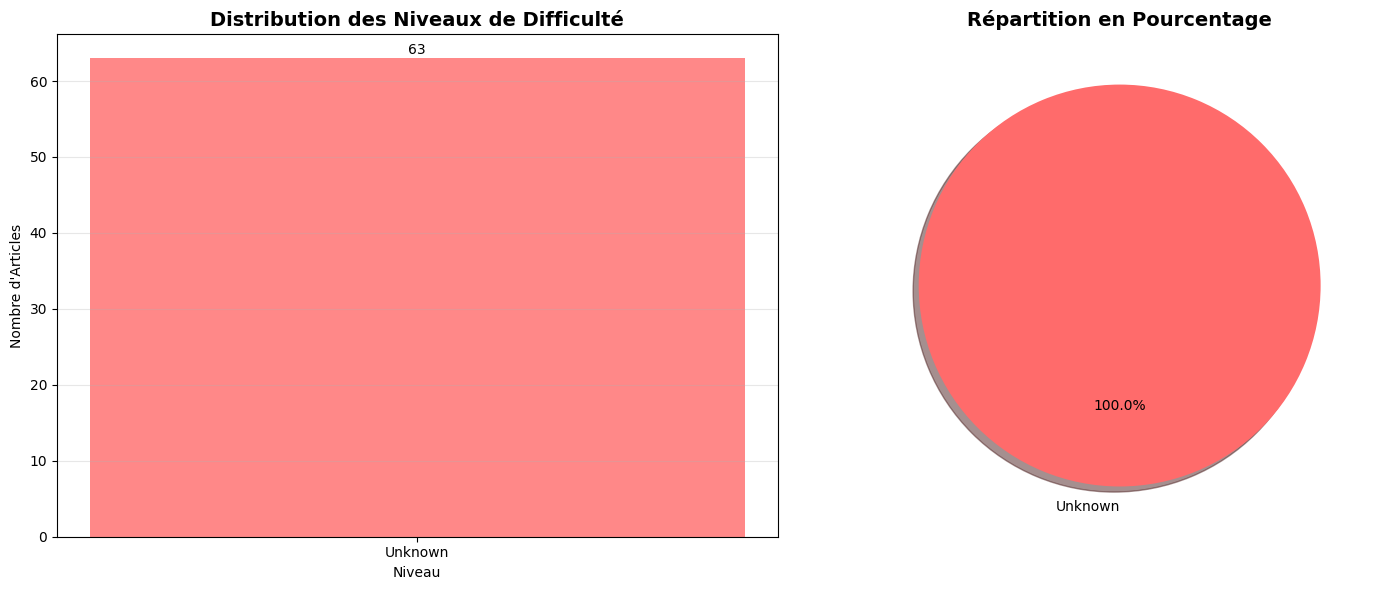


📈 Statistiques des topics:
   Total articles: 63
   Unknown: 63 articles (100.0%)


In [8]:
if not df_classified.empty and 'topic_prediction' in df_classified.columns:
    # Distribution des topics
    topic_counts = df_classified['topic_prediction'].value_counts()
    
    # Graphique matplotlib
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar chart
    bars = ax1.bar(topic_counts.index, topic_counts.values, 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
    ax1.set_title('Distribution des Niveaux de Difficulté', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Niveau')
    ax1.set_ylabel('Nombre d\'Articles')
    ax1.grid(axis='y', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom')
    
    # Pie chart
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    ax2.pie(topic_counts.values, labels=topic_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, shadow=True)
    ax2.set_title('Répartition en Pourcentage', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques
    print(f"\n📈 Statistiques des topics:")
    print(f"   Total articles: {len(df_classified)}")
    for topic, count in topic_counts.items():
        pct = (count / len(df_classified)) * 100
        print(f"   {topic}: {count} articles ({pct:.1f}%)")
        
else:
    print("❌ Données de classification non disponibles")

## 😊 2. Analyse des Sentiments

In [9]:
if not df_classified.empty and 'sentiment_label' in df_classified.columns:
    # Distribution des sentiments
    sentiment_counts = df_classified['sentiment_label'].value_counts()
    
    # Créer un graphique interactif avec plotly
    colors_sentiment = {
        'Positif': '#4CAF50',
        'Négatif': '#F44336',
        'Neutre': '#FFC107'
    }
    
    fig = px.bar(
        x=sentiment_counts.index,
        y=sentiment_counts.values,
        title='Analyse des Sentiments dans les Articles',
        labels={'x': 'Sentiment', 'y': 'Nombre d\'Articles'},
        color=sentiment_counts.index,
        color_discrete_map=colors_sentiment
    )
    
    fig.update_layout(
        showlegend=False,
        height=500
    )
    
    # Ajouter les valeurs
    fig.update_traces(texttemplate='%{y}', textposition='outside')
    
    fig.show()
    
    # Statistiques détaillées
    print(f"\n😊 Analyse des sentiments:")
    total = len(df_classified)
    for sentiment, count in sentiment_counts.items():
        pct = (count / total) * 100
        print(f"   {sentiment}: {count} articles ({pct:.1f}%)")
        
    # Analyse croisée sentiment vs topic
    if 'topic_prediction' in df_classified.columns:
        print(f"\n📊 Analyse croisée Sentiment vs Niveau:")
        cross_tab = pd.crosstab(df_classified['sentiment_label'], df_classified['topic_prediction'])
        display(cross_tab)
        
else:
    print("❌ Données de sentiment non disponibles")


😊 Analyse des sentiments:
   Critique: 39 articles (61.9%)
   Positif: 19 articles (30.2%)
   Neutre: 5 articles (7.9%)

📊 Analyse croisée Sentiment vs Niveau:


topic_prediction,Unknown
sentiment_label,
Critique,39
Neutre,5
Positif,19


## ☁️ 3. Nuage de Mots (WordCloud)

📝 Nuage de mots - Titres des articles


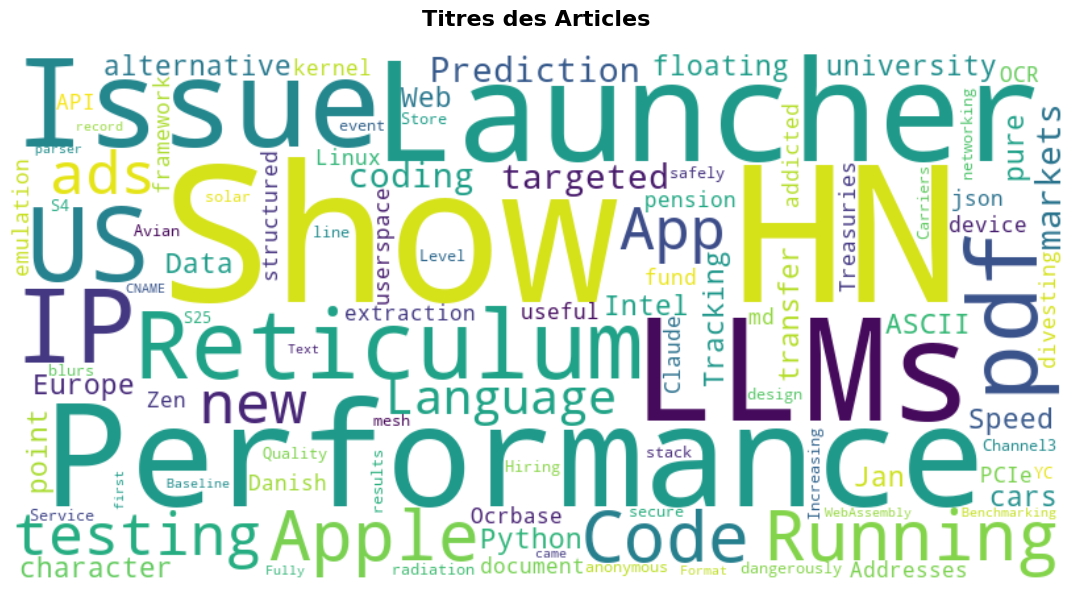


🔤 Nuage de mots - Mots-clés après preprocessing


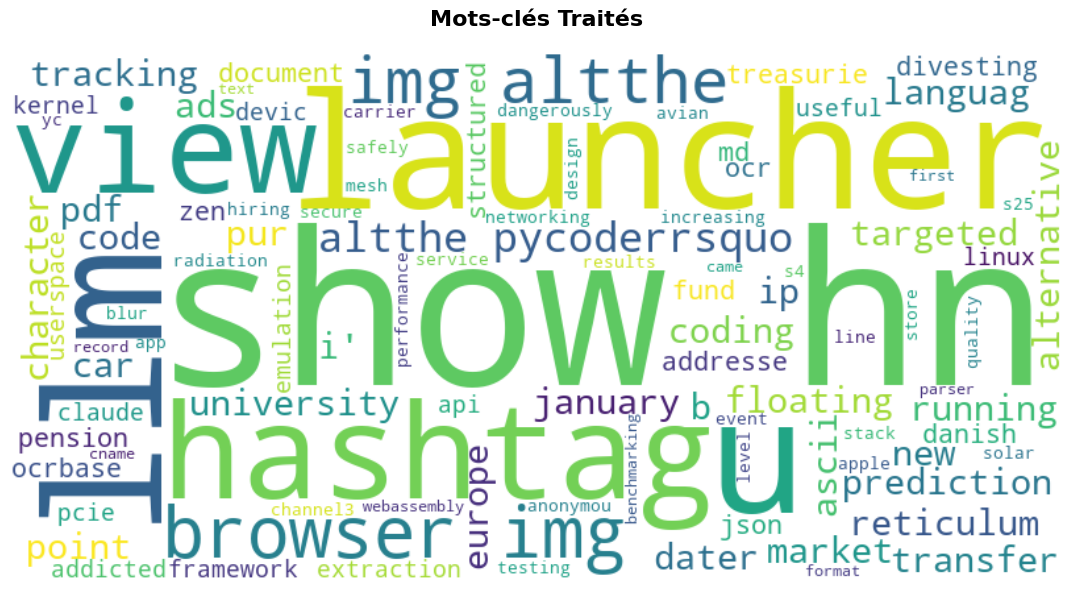


🔝 Top 20 mots les plus fréquents:
   the: 18 occurrences
   in: 17 occurrences
   of: 11 occurrences
   and: 11 occurrences
   to: 7 occurrences
   show: 6 occurrences
   hn: 6 occurrences
   for: 5 occurrences
   2025: 4 occurrences
   with: 4 occurrences
   browser: 4 occurrences
   over: 3 occurrences
   by: 3 occurrences
   an: 3 occurrences
   launcher: 3 occurrences
   how: 3 occurrences
   hashtag: 3 occurrences
   view: 3 occurrences
   img: 3 occurrences
   altthe: 3 occurrences


In [10]:
def create_wordcloud(text_data, title="Nuage de Mots"):
    """Crée un nuage de mots à partir de données textuelles"""
    # Vérifier si text_data est vide (pour Series pandas ou listes)
    if hasattr(text_data, 'empty'):
        # C'est une Series pandas
        if text_data.empty:
            print(f"❌ Pas de données pour {title}")
            return
    elif not text_data:
        # C'est une liste ou autre séquence
        print(f"❌ Pas de données pour {title}")
        return
    
    # Combiner tous les textes
    all_text = ' '.join(str(text) for text in text_data if text)
    
    if not all_text.strip():
        print(f"❌ Texte vide pour {title}")
        return
    
    # Créer le wordcloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100,
        contour_width=1,
        contour_color='steelblue'
    ).generate(all_text)
    
    # Afficher
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# WordCloud des titres
if not df_raw.empty and 'title' in df_raw.columns:
    print("📝 Nuage de mots - Titres des articles")
    create_wordcloud(df_raw['title'].dropna(), "Titres des Articles")

# WordCloud du contenu traité
if not df_processed.empty and 'tokens' in df_processed.columns:
    print("\n🔤 Nuage de mots - Mots-clés après preprocessing")
    # Combiner tous les tokens
    all_tokens = []
    for tokens_list in df_processed['tokens'].dropna():
        if isinstance(tokens_list, list):
            all_tokens.extend(tokens_list)
    
    if all_tokens:
        create_wordcloud([' '.join(all_tokens)], "Mots-clés Traités")
        
        # Top 20 mots les plus fréquents
        word_freq = Counter(all_tokens)
        top_words = word_freq.most_common(20)
        
        print(f"\n🔝 Top 20 mots les plus fréquents:")
        for word, freq in top_words:
            print(f"   {word}: {freq} occurrences")

## 📈 4. Métriques de Qualité du Preprocessing

In [11]:
if not df_processed.empty:
    metrics_cols = ['token_loss_pct', 'num_tokens_original', 'num_tokens_final']
    available_metrics = [col for col in metrics_cols if col in df_processed.columns]
    
    if available_metrics:
        # Créer un subplot pour les métriques
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=['Distribution des Pertes de Tokens',
                          'Tokens Originaux vs Finaux',
                          'Évolution des Métriques',
                          'Corrélations'],
            specs=[[{"type": "histogram"}, {"type": "scatter"}],
                   [{"type": "scatter"}, {"type": "heatmap"}]]
        )
        
        # 1. Distribution des pertes de tokens
        if 'token_loss_pct' in df_processed.columns:
            token_losses = df_processed['token_loss_pct'].dropna()
            fig.add_trace(
                go.Histogram(x=token_losses, nbinsx=20, name="Pertes de Tokens"),
                row=1, col=1
            )
        
        # 2. Scatter plot: tokens originaux vs finaux
        if all(col in df_processed.columns for col in ['num_tokens_original', 'num_tokens_final']):
            fig.add_trace(
                go.Scatter(
                    x=df_processed['num_tokens_original'],
                    y=df_processed['num_tokens_final'],
                    mode='markers',
                    name="Tokens",
                    marker=dict(color='red', size=6)
                ),
                row=1, col=2
            )
            
            # Ajouter ligne diagonale (parfaite conservation)
            max_tokens = max(df_processed['num_tokens_original'].max(), 
                           df_processed['num_tokens_final'].max())
            fig.add_trace(
                go.Scatter(
                    x=[0, max_tokens],
                    y=[0, max_tokens],
                    mode='lines',
                    name="Conservation Parfaite",
                    line=dict(dash='dash', color='gray')
                ),
                row=1, col=2
            )
        
        # 3. Évolution des pertes
        if 'token_loss_pct' in df_processed.columns:
            fig.add_trace(
                go.Scatter(
                    x=list(range(len(df_processed))),
                    y=df_processed['token_loss_pct'],
                    mode='lines+markers',
                    name="Évolution Pertes",
                    line=dict(color='orange')
                ),
                row=2, col=1
            )
        
        # 4. Heatmap des corrélations
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 1:
            corr_matrix = df_processed[numeric_cols].corr()
            fig.add_trace(
                go.Heatmap(
                    z=corr_matrix.values,
                    x=corr_matrix.columns,
                    y=corr_matrix.columns,
                    colorscale='RdBu',
                    name="Corrélations"
                ),
                row=2, col=2
            )
        
        fig.update_layout(
            height=800,
            title_text="Métriques de Qualité du Preprocessing",
            showlegend=False
        )
        
        fig.show()
        
        # Statistiques détaillées
        print(f"\n📊 Statistiques de preprocessing:")
        if 'token_loss_pct' in df_processed.columns:
            losses = df_processed['token_loss_pct'].dropna()
            print(f"   Perte moyenne de tokens: {losses.mean():.1f}%")
            print(f"   Perte médiane: {losses.median():.1f}%")
            print(f"   Écart-type: {losses.std():.1f}%")
        
        if 'num_tokens_final' in df_processed.columns:
            final_tokens = df_processed['num_tokens_final'].dropna()
            print(f"   Tokens finaux moyens: {final_tokens.mean():.1f}")
            print(f"   Article le plus long: {final_tokens.max():.0f} tokens")
            print(f"   Article le plus court: {final_tokens.min():.0f} tokens")
            
    else:
        print("❌ Métriques de preprocessing non disponibles")
else:
    print("❌ Données de preprocessing non disponibles")


📊 Statistiques de preprocessing:
   Perte moyenne de tokens: 8.2%
   Perte médiane: 0.0%
   Écart-type: 10.5%


## 🔍 5. Analyse des Sources et Déduplication

In [12]:
# Analyse des sources
if not df_classified.empty and 'source' in df_classified.columns:
    source_counts = df_classified['source'].value_counts()
    
    fig = px.pie(
        values=source_counts.values,
        names=source_counts.index,
        title='Répartition des Sources d\'Articles',
        color_discrete_sequence=px.colors.qualitative.Set3
    )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()
    
    print(f"\n📰 Analyse des sources:")
    for source, count in source_counts.items():
        pct = (count / len(df_classified)) * 100
        print(f"   {source}: {count} articles ({pct:.1f}%)")

# Analyse de la déduplication
if not df_classified.empty and 'is_duplicate' in df_classified.columns:
    duplicate_counts = df_classified['is_duplicate'].value_counts()
    
    fig = px.bar(
        x=['Uniques', 'Doublons'] if False in duplicate_counts.index else ['Uniques'],
        y=[duplicate_counts.get(False, 0), duplicate_counts.get(True, 0)],
        title='Déduplication des Articles',
        labels={'x': 'Type', 'y': 'Nombre d\'Articles'}
    )
    fig.update_traces(marker_color=['#4CAF50', '#F44336'])
    fig.show()
    
    total_articles = len(df_classified)
    unique_articles = duplicate_counts.get(False, 0)
    duplicate_rate = ((total_articles - unique_articles) / total_articles) * 100
    
    print(f"\n🔄 Analyse de déduplication:")
    print(f"   Articles totaux: {total_articles}")
    print(f"   Articles uniques: {unique_articles}")
    print(f"   Taux de doublons: {duplicate_rate:.1f}%")


📰 Analyse des sources:
   HackerNews: 60 articles (95.2%)
   RSS: 3 articles (4.8%)



🔄 Analyse de déduplication:
   Articles totaux: 63
   Articles uniques: 62
   Taux de doublons: 1.6%


## 📋 6. Résumé Exécutif

In [13]:
print("=" * 60)
print("📊 RÉSUMÉ EXÉCUTIF - ANALYSE DES DONNÉES")
print("=" * 60)

# Métriques générales
print(f"\n📈 MÉTRIQUES GÉNÉRALES")
print(f"   Articles collectés: {len(df_raw) if not df_raw.empty else 0}")
print(f"   Articles traités: {len(df_processed) if not df_processed.empty else 0}")
print(f"   Articles classifiés: {len(df_classified) if not df_classified.empty else 0}")

# Analyse des topics
if not df_classified.empty and 'topic_prediction' in df_classified.columns:
    topic_counts = df_classified['topic_prediction'].value_counts()
    print(f"\n🎯 DISTRIBUTION DES TOPICS")
    for topic, count in topic_counts.items():
        pct = (count / len(df_classified)) * 100
        print(f"   {topic}: {count} articles ({pct:.1f}%)")

# Analyse des sentiments
if not df_classified.empty and 'sentiment_label' in df_classified.columns:
    sentiment_counts = df_classified['sentiment_label'].value_counts()
    print(f"\n😊 ANALYSE DES SENTIMENTS")
    for sentiment, count in sentiment_counts.items():
        pct = (count / len(df_classified)) * 100
        print(f"   {sentiment}: {count} articles ({pct:.1f}%)")

# Métriques de qualité
if not df_processed.empty and 'token_loss_pct' in df_processed.columns:
    losses = df_processed['token_loss_pct'].dropna()
    print(f"\n🔧 QUALITÉ DU PREPROCESSING")
    print(f"   Perte moyenne de tokens: {losses.mean():.1f}%")
    print(f"   Perte médiane: {losses.median():.1f}%")

# Recommandations
print(f"\n💡 RECOMMANDATIONS")
if not df_classified.empty:
    if len(df_classified) < 50:
        print(f"   ⚠️  Peu d'articles collectés - augmenter les sources")
    else:
        print(f"   ✅ Volume d'articles satisfaisant")
        
    # Vérifier l'équilibre des classes
    if 'topic_prediction' in df_classified.columns:
        topic_counts = df_classified['topic_prediction'].value_counts()
        if topic_counts.min() / topic_counts.max() < 0.3:
            print(f"   ⚠️  Déséquilibre des classes détecté")
        else:
            print(f"   ✅ Équilibre des classes satisfaisant")

print(f"\n" + "=" * 60)
print(f"🎯 ANALYSE TERMINÉE - {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}")
print(f"=" * 60)

📊 RÉSUMÉ EXÉCUTIF - ANALYSE DES DONNÉES

📈 MÉTRIQUES GÉNÉRALES
   Articles collectés: 63
   Articles traités: 63
   Articles classifiés: 63

🎯 DISTRIBUTION DES TOPICS
   Unknown: 63 articles (100.0%)

😊 ANALYSE DES SENTIMENTS
   Critique: 39 articles (61.9%)
   Positif: 19 articles (30.2%)
   Neutre: 5 articles (7.9%)

🔧 QUALITÉ DU PREPROCESSING
   Perte moyenne de tokens: 8.2%
   Perte médiane: 0.0%

💡 RECOMMANDATIONS
   ✅ Volume d'articles satisfaisant
   ✅ Équilibre des classes satisfaisant

🎯 ANALYSE TERMINÉE - 2026-01-21 11:32
